In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("titanic_toy.csv")

In [3]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [4]:
df.shape

(891, 4)

In [5]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [6]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [7]:
X = df.drop(columns="Survived")

In [8]:
y = df["Survived"]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
#df["Fare_mean"] = df["Fare"].mean()

In [11]:
#df.isnull().mean() *100

In [12]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

# Replace NAN value with mean and median.

In [13]:
mean_age = X_train["Age"].mean()
median_age = X_train["Age"].median()

In [14]:
X_train["Age_mean"]= X_train["Age"].fillna(mean_age)
X_train["Age_median"]= X_train["Age"].fillna(median_age)

In [15]:
X_train["Fare_mean"] =  X_train["Fare"].fillna(X_train["Fare"].mean())
X_train["Fare_median"] = X_train["Fare"].fillna(X_train["Fare"].median())

In [16]:
X_train

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
331,45.5,28.5000,0,45.500000,45.5,28.500000,28.5000
733,23.0,13.0000,0,23.000000,23.0,13.000000,13.0000
382,32.0,7.9250,0,32.000000,32.0,7.925000,7.9250
704,26.0,7.8542,1,26.000000,26.0,7.854200,7.8542
813,6.0,31.2750,6,6.000000,6.0,31.275000,31.2750
...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.000000,21.0,7.650000,7.6500
270,NaN,31.0000,0,29.498846,28.0,31.000000,31.0000
860,41.0,NaN,2,41.000000,41.0,32.517788,14.4000
435,14.0,120.0000,3,14.000000,14.0,120.000000,120.0000


In [17]:
print("Original Age Variance : ", X_train["Age"].var())
print("Afetr mean Age Variance : ", X_train["Age_mean"].var())
print("Afetr median Age Variance : ", X_train["Age_median"].var())

print()

print("Original Fare Variance : ", X_train["Fare"].var())
print("Afetr mean Fare Variance : ", X_train["Fare_mean"].var())
print("Afetr median Fare Variance : ", X_train["Fare_median"].var())

Original Age Variance :  210.2517072477438
Afetr mean Age Variance :  168.8519336687225
Afetr median Age Variance :  169.20731007048096

Original Fare Variance :  2761.031434948639
Afetr mean Fare Variance :  2621.2323749512393
Afetr median Fare Variance :  2637.01248167777


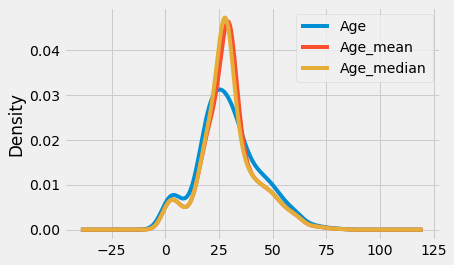

In [26]:
# KDE Checks Variance 
# We see lots of changes in variance 
X_train["Age"].plot(kind="kde")
X_train["Age_mean"].plot(kind="kde")
X_train["Age_median"].plot(kind="kde")

plt.legend()
plt.show()
plt.style.use("fivethirtyeight")

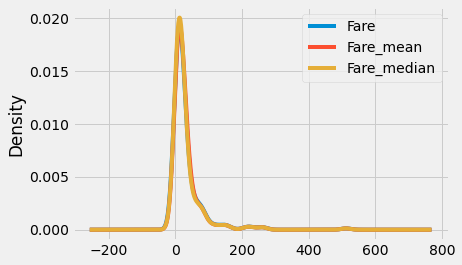

In [19]:
X_train["Fare"].plot(kind="kde")
X_train["Fare_mean"].plot(kind="kde")
X_train["Fare_median"].plot(kind="kde")

plt.legend()
plt.show()

# Doing same thing in sklearn

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [21]:
tnf = ColumnTransformer(transformers=[
    ("median_age",SimpleImputer(strategy="median"),["Age"]),
    ("mean_Fare",SimpleImputer(),["Fare"])
],remainder="passthrough")

In [24]:
tnf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('median_age', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('mean_Fare', SimpleImputer(), ['Fare'])])